In [52]:
!pip install --user git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-48v93a29
  Running command git clone -q https://github.com/matplotlib/basemap.git /tmp/pip-req-build-48v93a29
     |████████████████████████████████| 219 kB 3.3 MB/s eta 0:00:01
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp38-cp38-linux_x86_64.whl size=121771294 sha256=56eecfde017287b056f1b022ffff311bb402a672d904ff993bbc15435c159153
  Stored in directory: /tmp/pip-ephem-wheel-cache-gkrvoa00/wheels/20/f0/b6/96d84e9a5c4f737631d2b49fc19084ae8db1ee178658483ab0
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37262 sha256=c366c29987f88aaed242f62e2c207bfd7e28294d2d7a7fa760137dff6f83bc71
  Stored in directory: /home/andre/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built basemap pyshp


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

## Data wrangling

There are two different sets of data which cover distinct timeframes on the reported road accidents in Brazil. The first exhibits the accidents from 2007 to 2016, whereas the second portraits the data from 2017 to 2020. Although they mostly present the same features, the second dataset expands both on the details and accuracies of the reports, also adding some features not found in the first dataset. Thus, merging the datasets would mean lose a more detailed information on the main causes fo accidents in recent years. As such, two dataframes will be created and the analysis will be performed on each one. 

In [84]:
path1 = r'Datasets/Acidentes/2007-2016' 
all_files1 = glob.glob(path1 + "/*.csv") # loading all csv files in the directory

path2 = r'Datasets/Acidentes/2017-2020' 
all_files2 = glob.glob(path2 + "/*.csv") # loading all csv files in the directory

csv_files1 = []
csv_files2 = []

for filename in all_files1:
    frame = pd.read_csv(filename, index_col=None, header=0, sep=';', encoding='ISO-8859-1', low_memory=False)
    csv_files1.append(frame)
    
for filename in all_files2:
    frame = pd.read_csv(filename, index_col=None, header=0, sep=';', encoding='ISO-8859-1', 
                        decimal=',', low_memory=False)
    csv_files2.append(frame)

df1 = pd.concat(csv_files1, axis=0, ignore_index=True)
df2 = pd.concat(csv_files2, axis=0, ignore_index=True)

In [85]:
df1.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,10,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,Rural,2007.0,9,0,4,0,5,0,4,6
1,10,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,Rural,2007.0,9,0,4,0,5,0,4,6
2,1032898,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,Rural,2007.0,3,0,0,1,2,0,1,1
3,1051130,12/02/2007,Segunda,02:10:00,MA,135,11,SAO LUIS,Animais na Pista,Atropelamento de animal,...,Urbano,2007.0,5,2,2,1,0,0,3,1
4,1066824,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,Rural,2007.0,1,0,1,0,0,0,1,1


In [86]:
df2.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8.0,2017-01-01,domingo,00:00:00,PR,376.0,112.0,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,...,1,0,0,1,1,-23.098807,-52.387894,SR-PR,DEL7/7,UOP05/PR
1,9.0,2017-01-01,domingo,00:01:00,SC,101.0,234.0,PALHOCA,Falta de Atenção à Condução,Colisão com objeto estático,...,0,1,0,0,1,-27.810100,-48.635700,SR-SC,DEL8/1,UOP02/SC
2,11.0,2017-01-01,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,...,0,0,0,2,1,-23.369520,309.935131,SR-PR,DEL7/7,UOP07/PR
3,12.0,2017-01-01,domingo,00:00:00,GO,153.0,435.0,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Tombamento,...,1,0,0,1,1,-16.274737,-48.969090,SR-GO,DEL1/2,UOP01/GO
4,13.0,2017-01-01,domingo,00:00:00,SC,280.0,77.3,CORUPA,Ingestão de Álcool,Saída de leito carroçável,...,0,0,0,1,1,-26.446752,-49.201670,SR-SC,DEL8/6,UOP03/SC


Some columns have redundant or less important data, which could be removed without a significant loss of information.

In [87]:
# Dropping columns from df1
df1.drop(['id','br','km','sentido_via','tracado_via','tipo_acidente','ano','tipo_pista','feridos'], 
        axis=1, inplace=True)
# Dropping columns from df2
df2.drop(['id','br','km','sentido_via','tracado_via','tipo_acidente','tipo_pista','feridos',
         'regional','delegacia','uop'], axis=1, inplace=True)

In [88]:
print(df1.columns)
print(df2.columns)

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'municipio',
       'causa_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'uso_solo', 'pessoas', 'mortos',
       'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'veiculos'],
      dtype='object')
Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'municipio',
       'causa_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'uso_solo', 'pessoas', 'mortos',
       'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'veiculos',
       'latitude', 'longitude'],
      dtype='object')


In [89]:
# Changing columns names
df1.columns = ['Date','Week_day','Hour','State', 'City', 'Cause_accident','Classification','Daytime','Weather_condition',
              'Highway','Number_people','Deceased','Slightly_injured','Seriously_injured','Unharmed','Ignored',
              'Number_vehicles']

df2.columns = ['Date','Week_day','Hour','State','City', 'Cause_accident','Classification','Daytime','Weather_condition',
              'Highway','Number_people','Deceased','Slightly_injured','Seriously_injured','Unharmed','Ignored',
              'Number_vehicles','Latitude','Longitude']

In [90]:
df2.head()

,Date,Week_day,Hour,State,City,Cause_accident,Classification,Daytime,Weather_condition,Highway,Number_people,Deceased,Slightly_injured,Seriously_injured,Unharmed,Ignored,Number_vehicles,Latitude,Longitude
0,2017-01-01,domingo,00:00:00,PR,PARANAVAI,Fenômenos da Natureza,Com Vítimas Feridas,Plena Noite,Chuva,Não,1,0,0,1,0,0,1,-23.098807,-52.387894
1,2017-01-01,domingo,00:01:00,SC,PALHOCA,Falta de Atenção à Condução,Sem Vítimas,Plena Noite,Chuva,Não,1,0,0,0,1,0,1,-27.810100,-48.635700
2,2017-01-01,domingo,00:00:00,PR,SANTO ANTONIO DA PLATINA,Animais na Pista,Com Vítimas Feridas,Plena Noite,Garoa/Chuvisco,Não,2,0,2,0,0,0,1,-23.369520,309.935131
3,2017-01-01,domingo,00:00:00,GO,ANAPOLIS,Avarias e/ou desgaste excessivo no pneu,Com Vítimas Feridas,Plena Noite,Céu Claro,Sim,1,0,0,1,0,0,1,-16.274737,-48.969090
4,2017-01-01,domingo,00:00:00,SC,CORUPA,Ingestão de Álcool,Com Vítimas Feridas,Plena Noite,Chuva,Não,1,0,1,0,0,0,1,-26.446752,-49.201670


In [91]:
# Checking the unique entries on df1
print('Entries in df1:\n')
for column in df1.columns[3:9]:
    print(f'{column}:\n{pd.unique(df1[column])}')
    print()
    
# Checking the unique entries on df2
print('\nEntries in df2:\n')
for column in df2.columns[3:9]:
    print(f'{column}:\n{pd.unique(df2[column])}')
    print()

Entries in df1:

State:
['MG' 'MA' 'CE' 'PR' 'ES' 'GO' 'RJ' 'RS' 'SP' 'RN' 'SC' 'PA' 'PE' 'MT'
 'BA' 'AL' 'TO' 'PI' 'MS' 'SE' 'RO' 'PB' 'AP' 'DF' 'AC' 'RR' 'AM' '(null)']

City:
['OLIVEIRA' 'ITABIRITO' 'SAO LUIS' ... 'ACARAU' 'CASTILHO'
 'SANTA CRUZ DO CAPIBARIBE']

Cause_accident:
['Falta de atenção' 'Outras' 'Animais na Pista'
 'Defeito mecânico em veículo' 'Não guardar distância de segurança'
 'Velocidade incompatível' 'Desobediência à sinalização'
 'Ingestão de álcool' 'Defeito na via' 'Dormindo' 'Ultrapassagem indevida'
 '(null)']

Classification:
['(null)' 'Com Vítimas Feridas' 'Com Vítimas Fatais' 'Sem Vítimas'
 'Ignorado' nan]

Daytime:
['Pleno dia' 'Plena noite' 'Amanhecer' 'Anoitecer' '(null)' nan]

Weather_condition:
['Ceu Claro' 'Chuva' 'Nublado' 'Sol' 'Nevoeiro/neblina' 'Ignorada' 'Vento'
 'Granizo' '(null)' 'Neve' nan]


Entries in df2:

State:
['PR' 'SC' 'GO' 'PB' 'TO' 'RS' 'PE' 'PI' 'CE' 'MS' 'SP' 'BA' 'SE' 'DF'
 'RJ' 'MG' 'PA' 'RO' 'AL' 'RN' 'MT' 'ES' 'MA' 'AC' 'RR' 'A

Many conclusions can be drawn based on the unique entry values from each dataframe:
- df1 has NaN values and a string entry named '(null)' in almost every column, probably indicating the absence of information;
- Almost every column on each dataframe either have an entry that can't be found in the other dataframe or it is written in a different way;
- The feature `accident_cause` has much more unique values in df2 than df1. Some values do match, but the rest must have been set as 'Outras' in df1;
- The feature `weather_condition` adds an entry called 'Garoa/Chuvisco' in df2;
- The `highway` feature, which shows the portion of the accidents that happened on urban or rural areas is filled with different values in each dataframe. According to the supporting materials, 'Sim' = 'Urbano' and 'Não' = 'Rural'. 

In [92]:
# Removing the string entry (null) from every column in df1
for column in df1.columns:
    df1 = df1[df1[column].map(lambda x: str(x) != '(null)')]

In [93]:
# Dropping the NaN rows
df1.dropna(how='any', inplace=True)
df2.dropna(how='any', inplace=True)

In [94]:
# Changing the entries on 'highway' in df2 to match df1
df2['Highway'].replace({'Sim':'Urbano', 'Não':'Rural'}, inplace=True)

In [95]:
# Checking the unique entries on df1
print('Entries in df1:\n')
for column in df1.columns[3:9]:
    print(f'{column}:\n{pd.unique(df1[column])}')
    print()

# Checking the unique entries on df2
print('\nEntries in df2:\n')
for column in df2.columns[3:9]:
    print(f'{column}:\n{pd.unique(df2[column])}')
    print()

Entries in df1:

State:
['MG' 'MA' 'CE' 'PR' 'ES' 'GO' 'RJ' 'RS' 'SP' 'RN' 'SC' 'PA' 'PE' 'MT'
 'BA' 'AL' 'TO' 'PI' 'MS' 'SE' 'RO' 'PB' 'AP' 'DF' 'AC' 'RR' 'AM']

City:
['ITABIRITO' 'SAO LUIS' 'CAUCAIA' ... 'ACARAU' 'CASTILHO'
 'SANTA CRUZ DO CAPIBARIBE']

Cause_accident:
['Outras' 'Animais na Pista' 'Defeito mecânico em veículo'
 'Falta de atenção' 'Não guardar distância de segurança'
 'Velocidade incompatível' 'Desobediência à sinalização'
 'Ingestão de álcool' 'Defeito na via' 'Dormindo' 'Ultrapassagem indevida']

Classification:
['Com Vítimas Feridas' 'Com Vítimas Fatais' 'Sem Vítimas' 'Ignorado']

Daytime:
['Pleno dia' 'Plena noite' 'Amanhecer' 'Anoitecer']

Weather_condition:
['Ceu Claro' 'Chuva' 'Nublado' 'Sol' 'Nevoeiro/neblina' 'Ignorada' 'Vento'
 'Granizo' 'Neve']


Entries in df2:

State:
['PR' 'SC' 'GO' 'PB' 'TO' 'RS' 'PE' 'PI' 'CE' 'MS' 'SP' 'BA' 'SE' 'DF'
 'RJ' 'MG' 'PA' 'RO' 'AL' 'RN' 'MT' 'ES' 'MA' 'AC' 'RR' 'AM' 'AP']

City:
['PARANAVAI' 'PALHOCA' 'SANTO ANTONIO DA PLA

In [96]:
# Combining the datasets to apply the same operations
combine = [df1,df2]

In [97]:
for dataframe in combine:
    # Concatenating the date and hour columns
    dataframe['Date'] = dataframe['Date'] + ' ' + dataframe['Hour'] 
    # Changing the column type
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    # Dropping the 'hour' colum
    dataframe.drop('Hour', axis=1, inplace=True)
    # Sorting the date column by asceding
    dataframe.sort_values(by='Date', ascending=True, inplace=True)
    # Reseting the index
    dataframe.reset_index(inplace=True)
    # Dropping the previous index
    dataframe.drop('index', axis=1, inplace=True)

In [98]:
df1.head()

,Date,Week_day,State,City,Cause_accident,Classification,Daytime,Weather_condition,Highway,Number_people,Deceased,Slightly_injured,Seriously_injured,Unharmed,Ignored,Number_vehicles
0,2007-01-01 00:00:00,Segunda,ES,SERRA,Falta de atenção,Sem Vítimas,Plena noite,Nublado,Urbano,2,0,0,0,2,0,2
1,2007-01-01 00:03:00,Segunda,RJ,RESENDE,Animais na Pista,Sem Vítimas,Plena noite,Chuva,Urbano,1,0,0,0,1,0,1
2,2007-01-01 00:04:00,Segunda,SP,UBATUBA,Velocidade incompatível,Com Vítimas Feridas,Plena noite,Chuva,Rural,5,0,4,0,1,0,2
3,2007-01-01 00:05:00,Segunda,MG,CARATINGA,Velocidade incompatível,Sem Vítimas,Plena noite,Nublado,Rural,1,0,0,0,1,0,1
4,2007-01-01 00:10:00,Segunda,DF,BRASILIA,Outras,Com Vítimas Fatais,Plena noite,Ceu Claro,Urbano,2,1,1,0,0,0,1


In [99]:
# Changing the values in the column week_day on df2 to match df1
df2['Week_day'].replace({'sábado':'Sábado', 'domingo':'Domingo', 'segunda-feira':'Segunda',
                        'terça-feira':'Terça','quarta-feira':'Quarta','quinta-feira':'Quinta',
                        'sexta-feira':'Sexta'}, inplace=True)

In [100]:
df1.describe()

,Number_people,Deceased,Slightly_injured,Seriously_injured,Unharmed,Ignored,Number_vehicles
count,1.562034e+06,1.562034e+06,1.562034e+06,1.562034e+06,1.562034e+06,1.562034e+06,1.562034e+06
mean,2.156255e+00,4.921468e-02,4.474230e-01,1.642359e-01,1.409444e+00,8.588417e-02,1.743172e+00
std,1.561613e+00,2.795266e-01,9.770337e-01,5.628513e-01,1.225868e+00,3.835940e-01,7.236237e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00
75%,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00
max,2.480000e+02,3.300000e+01,5.200000e+01,2.220000e+02,9.900000e+01,8.600000e+01,2.500000e+01


In [101]:
df2.describe()

,Number_people,Deceased,Slightly_injured,Seriously_injured,Unharmed,Ignored,Number_vehicles,Latitude,Longitude
count,289751.000000,289751.000000,289751.000000,289751.000000,289751.000000,289751.000000,289751.000000,2.897510e+05,2.897510e+05
mean,2.343191,0.076404,0.826078,0.248662,1.058188,0.133860,1.640050,-3.734266e+03,-1.423820e+04
std,1.858060,0.329376,1.086012,0.595844,1.431567,0.412079,0.737317,1.920611e+06,7.463203e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.531073e+01,-5.023120e+01
50%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,-2.038088e+01,-4.782336e+01
75%,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,-1.274097e+01,-4.264254e+01
max,80.000000,21.000000,58.000000,28.000000,73.000000,16.000000,23.000000,1.630000e+02,7.170000e+02


Some values in the `Latitude` and `Longitude` columns seem to be wrongly assined, as their values are far too low (min=-1.03e+09 or too high max=1.63e+02)

In [102]:
df2 = df2[(df2['Latitude'].between(-35, 7, inclusive=False) & df2['Longitude'].between(-77, -32, inclusive=False))]

In [20]:
# Removing the 2020 date
#df2 = df2[df2['Date'].dt.year != 2020]

## Investigating data relationships

#### - Total accidents by state

In [103]:
# Grouping the number of accidents by State
tmp1 = df1.groupby('State').size().sort_values(ascending=False).reset_index(name='2007-2016')
tmp2 = df2.groupby('State').size().sort_values(ascending=False).reset_index(name='2017-2020')
# Merging the dataframes
accidents_state = pd.merge(tmp1, tmp2, on='State')
# Summing the total of accidents during the whole period
accidents_state['Total'] = accidents_state['2007-2016'] + accidents_state['2017-2020']
accidents_state['Percentage'] = accidents_state['Total']/sum(accidents_state['Total'])
accidents_state.head()

,State,2007-2016,2017-2020,Total,Percentage
0,MG,228233,38870,267103,0.144245
1,SC,166859,34799,201658,0.108902
2,PR,157065,33506,190571,0.102915
3,RJ,139609,19367,158976,0.085853
4,RS,124645,19600,144245,0.077897


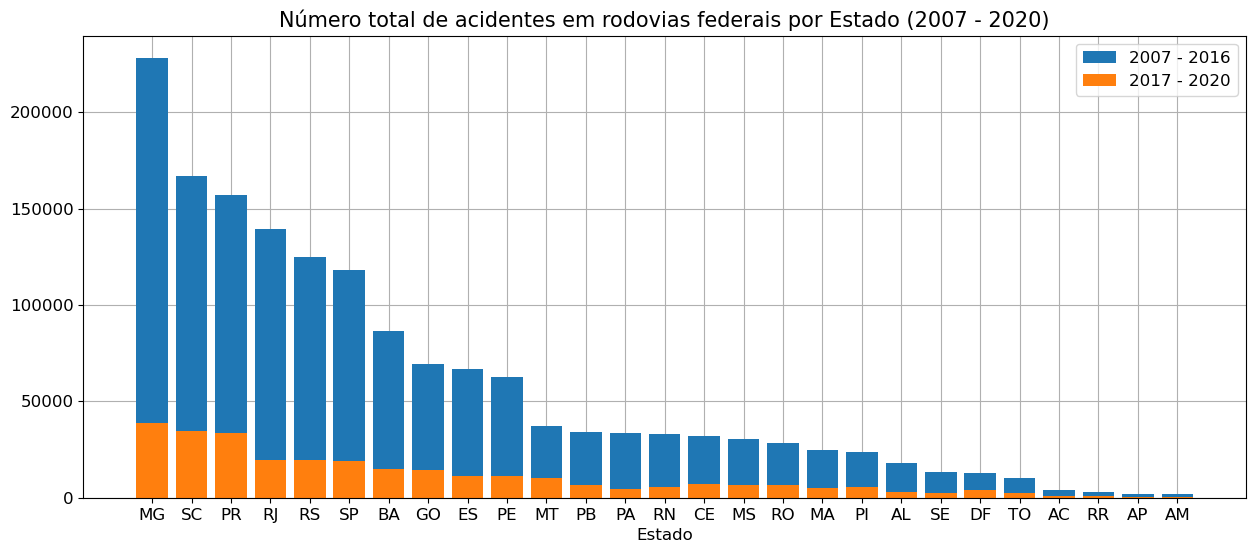

In [104]:
fig, ax = plt.subplots(figsize=(15,6))
plt.style.use('default')

ax.bar(accidents_state['State'],accidents_state['2007-2016'], label = '2007 - 2016')
ax.bar(accidents_state['State'],accidents_state['2017-2020'], label = '2017 - 2020')

ax.set_title('Número total de acidentes em rodovias federais por Estado (2007 - 2020)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Estado', fontsize=12)

plt.legend(fontsize=12)
ax.set_axisbelow(True)
plt.grid()
plt.show()

It's evident that the Minas Gerais State has the highest number of accidents. In fact, 7 of the top 10 States with more incidents are located in the Southeast region of Brazil. As for Minas Gerais State, the National Confederation of Transport (CNT in portuguese) [evaluated](https://www.cnt.org.br/agencia-cnt/malha-rodoviaria-minas-gerais-mais-precisa-investimentos) that more than 68% of its highways are ranked as regular, bad or terrible, with a need of more than R$ 9.2 billion for investments in restoration and reconstruction. 

#### - Total accidents by year

In [105]:
# Grouping some columns by year
tmp3 = df1.groupby(df1['Date'].dt.year)[['Deceased','Unharmed','Number_people','Number_vehicles']].sum()
tmp4 = df2.groupby(df2['Date'].dt.year)[['Deceased','Unharmed','Number_people','Number_vehicles']].sum()
tmp5 = pd.concat([tmp3,tmp4])

In [106]:
# Grouping the number of accidents by year
tmp6 = df1.groupby(df1['Date'].dt.year).size().reset_index(name='Total')
tmp7 = df2.groupby(df2['Date'].dt.year).size().reset_index(name='Total')
# Concatenating the dataframes
tmp8 = pd.concat([tmp6, tmp7])
# Merging with the metrics of tmp5
accidents_year = pd.merge(tmp5, tmp8, on='Date')

In [107]:
accidents_year

,Date,Deceased,Unharmed,Number_people,Number_vehicles,Total
0,2007,6739,174245,268212,215314,127627
1,2008,6914,196613,298775,242698,141029
2,2009,7341,223309,337126,274653,158637
3,2010,8622,268254,395355,321414,183451
4,2011,8674,280158,412259,339312,192312
5,2012,8661,267931,396875,328131,184549
6,2013,8426,276249,405818,333037,186746
7,2014,8233,243245,368454,301376,169178
8,2015,6867,159295,269019,208857,122147
9,2016,6398,112300,216251,158102,96358


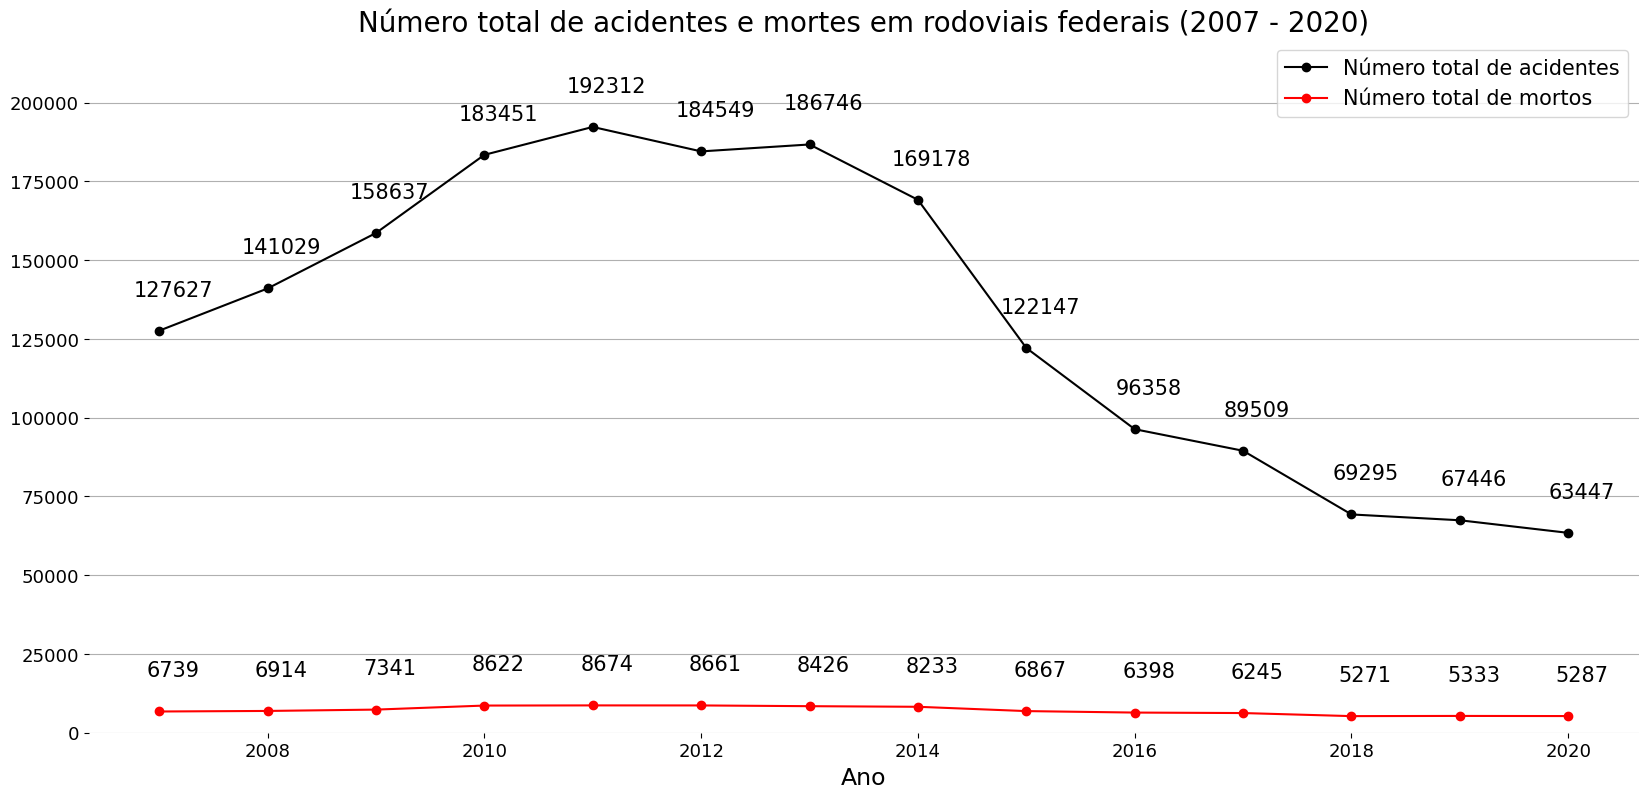

In [108]:
def annotate(x,y):
    
    for i,j in zip(x,y):
        plt.annotate(j, 
                     (i,j), 
                     textcoords="offset points",
                     xytext=(10,25),
                     ha='center',
                     size=15)
        
        
plt.figure(figsize=(20,9))
plt.style.use('default')

x = accidents_year['Date']
yd = accidents_year['Deceased']
yt = accidents_year['Total']

plt.plot(x, yt, '-bo', c='k', label='Número total de acidentes')
plt.plot(x, yd, '-bo', c='r', label='Número total de mortos')

annotate(x,yd)
annotate(x,yt)

plt.title('Número total de acidentes e mortes em rodoviais federais (2007 - 2020)', fontsize=20)
plt.xlabel('Ano', fontsize=17, c='k')
plt.yticks(fontsize=13, c='k')
plt.xticks(fontsize=13, c='k')

plt.legend(fontsize=15)
plt.grid(axis='y')
plt.box(False)
plt.ylim([0,220000])
plt.show()

# - Total accidents by days of week

In [109]:
# Grouping the number of accidents by State
tmp9 = df1.groupby('Week_day').size().sort_values(ascending=False).reset_index(name='2007-2016')
tmp10 = df2.groupby('Week_day').size().sort_values(ascending=False).reset_index(name='2017-2020')
# Merging the dataframes
accidents_day = pd.merge(tmp9, tmp10, on='Week_day')
# Summing the total of accidents during the whole period
accidents_day['Total'] = accidents_day['2007-2016'] + accidents_day['2017-2020']
accidents_day['Percentage'] = accidents_day['Total']/sum(accidents_day['Total'])
accidents_day.head()

,Week_day,2007-2016,2017-2020,Total,Percentage
0,Sexta,254517,44609,299126,0.161539
1,Sábado,243050,48151,291201,0.157259
2,Domingo,230835,47758,278593,0.150450
3,Segunda,215001,39224,254225,0.137290
4,Quinta,214414,37993,252407,0.136309


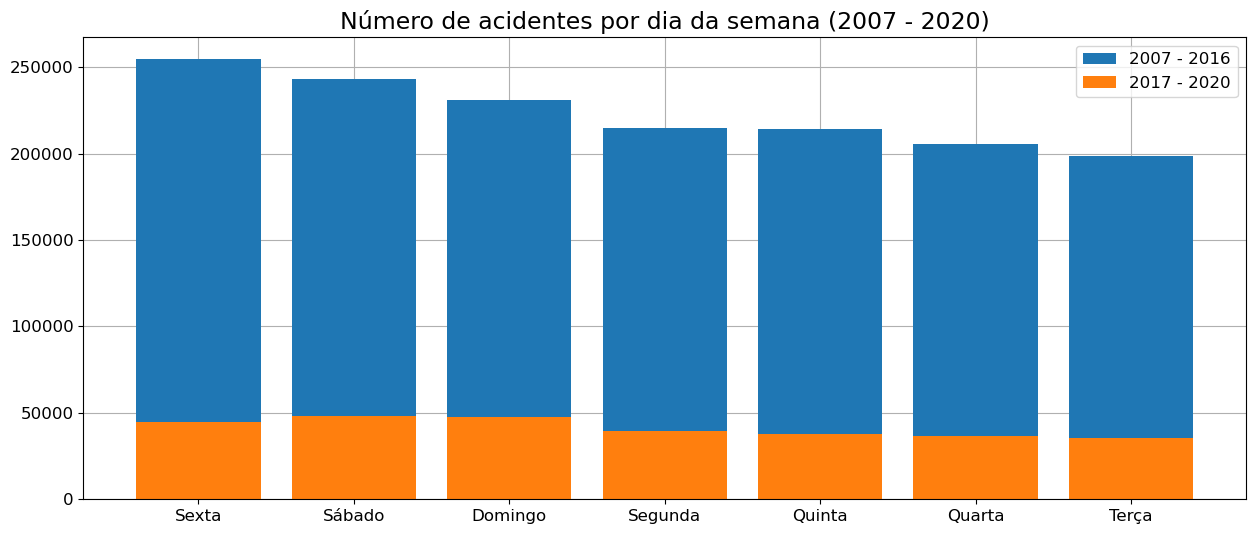

In [111]:
fig, ax = plt.subplots(figsize=(15,6))

plt.bar(accidents_day['Week_day'],accidents_day['2007-2016'], label = '2007 - 2016')
plt.bar(accidents_day['Week_day'],accidents_day['2017-2020'], label = '2017 - 2020')

plt.title('Número de acidentes por dia da semana (2007 - 2020)', fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.set_axisbelow(True)
plt.grid()
plt.show()

The accidents are more frequent on the weekends, specially on fridays. 

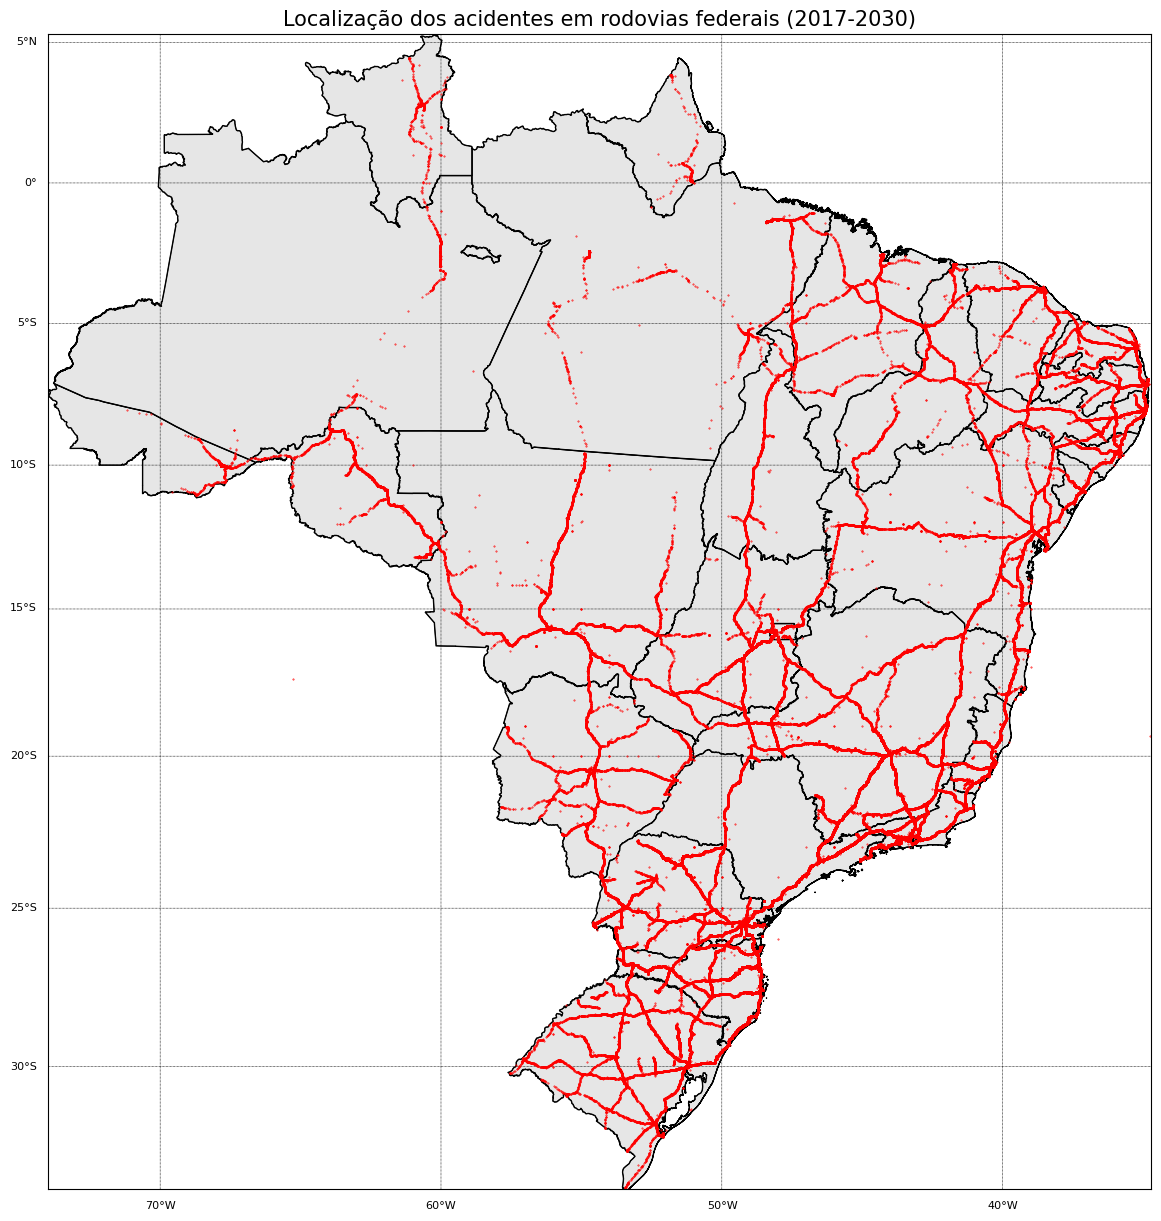

In [112]:
fig, ax = plt.subplots(figsize=(15,15))

# Creating a map of Brazil
m = Basemap(projection='merc', llcrnrlat=-33.7, urcrnrlat=5.3, llcrnrlon=-74, urcrnrlon=-34.7, resolution='c')
m.drawparallels(np.arange(5.,-50.,-5.),\
       labels=[1,0,0,0],fontsize=8,linewidth=0.5)
m.drawmeridians(np.arange(-100,-20,10),\
       labels=[0,0,0,1],fontsize=8,linewidth=0.5)

# Adding the shape of the States
shapefile_states='Brasil/gadm36_BRA_1/gadm36_BRA_1'
shp = m.readshapefile(shapefile_states, 'states', drawbounds=True)
for nshape, seg in enumerate(m.states):
        poly = Polygon(seg, facecolor='0.90', edgecolor='k')
        ax.add_patch(poly)
          
#Adding the locations of the accidents
x,y = m(df2['Longitude'].tolist(),df2['Latitude'].tolist())
m.plot(x, y, 'bo', c='red', markersize=0.4)
plt.title('Localização dos acidentes em rodovias federais (2017-2030)', fontsize=15)
plt.show()

In [113]:
# Grouping some columns by Weather condition
tmp9 = df1.groupby('Weather_condition').size().sort_values(ascending=False).reset_index(name='2007-2016')
tmp10 = df2.groupby('Weather_condition').size().sort_values(ascending=False).reset_index(name='2017-2020')
accidents_weather = pd.merge(tmp9, tmp10, on='Weather_condition')

In [114]:
accidents_weather

,Weather_condition,2007-2016,2017-2020
0,Nublado,283127,50753
1,Chuva,271324,35955
2,Sol,204748,22178
3,Vento,4279,626
4,Granizo,292,9
5,Neve,105,3


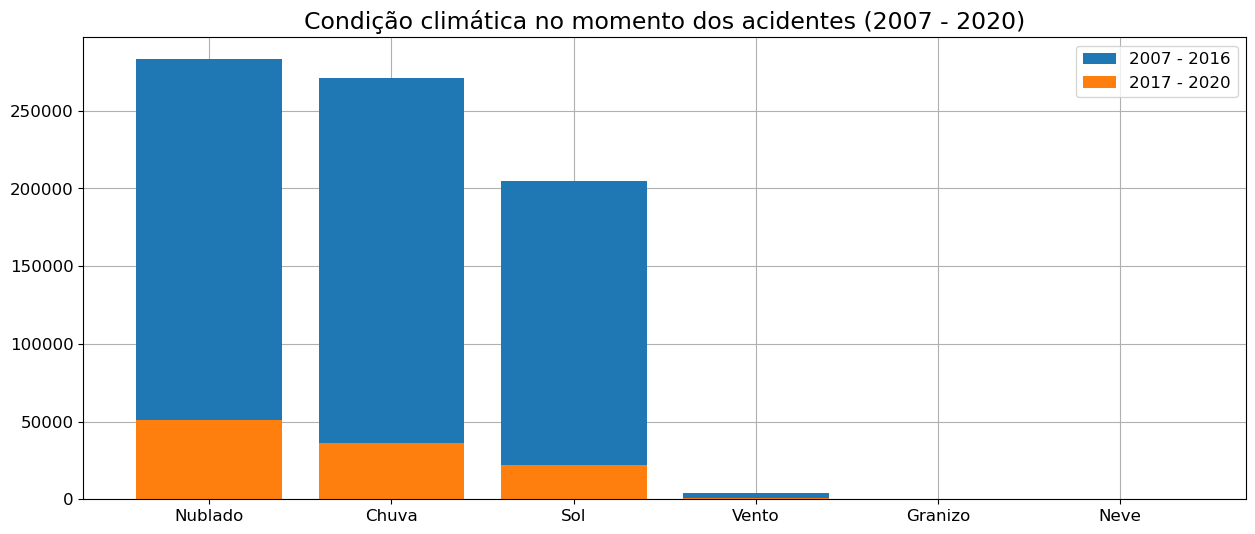

In [115]:
fig, ax = plt.subplots(figsize=(15,6))

plt.bar(accidents_weather['Weather_condition'],accidents_weather['2007-2016'], label = '2007 - 2016')
plt.bar(accidents_weather['Weather_condition'],accidents_weather['2017-2020'], label = '2017 - 2020')

plt.title('Condição climática no momento dos acidentes (2007 - 2020)', fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.set_axisbelow(True)
plt.grid()
plt.show()

In [137]:
# Most dangerous cities
tmp11 = df1.groupby(['City', 'State']).size().sort_values(ascending=False).reset_index(name='2007-2016')
tmp12 = df2.groupby(['City', 'State']).size().sort_values(ascending=False).reset_index(name='2017-2020')
dangerous_cities = pd.merge(tmp11, tmp12, on=['City', 'State'])
dangerous_cities.head(10)

,City,State,2007-2016,2017-2020
0,CURITIBA,PR,21217,4302
1,SAO JOSE,SC,18086,3271
2,BETIM,MG,16352,2160
3,DUQUE DE CAXIAS,RJ,16327,2158
4,GUARULHOS,SP,16308,2976
5,SERRA,ES,15956,2364
6,BRASILIA,DF,12707,4089
7,CARIACICA,ES,12597,1578
8,PORTO VELHO,RO,12044,1844
9,RECIFE,PE,11701,1718


In [134]:
dangerous_cities.head(10)

,City,2007-2016,2017-2020
0,CURITIBA,21217,4302
1,SAO JOSE,18086,3271
2,BETIM,16352,2160
3,DUQUE DE CAXIAS,16327,2158
4,GUARULHOS,16308,2976
5,SERRA,15956,2364
6,BRASILIA,12707,4089
7,CARIACICA,12597,1578
8,PORTO VELHO,12044,1844
9,RECIFE,11701,1718
